In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
cust=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv')
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [3]:
repay=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')
repay

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,09-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [4]:
spend=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [5]:
# 1a - In case age is less than 18, replace it with mean of age values.
cust['Age']=np.where(cust.Age<18, round(cust.Age.mean()), cust['Age'])

In [6]:
cust[cust.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment


In [7]:
cust[cust.Age==46]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46,COCHIN,Platimum,500000.0,C23,Govt
53,54,A54,46,COCHIN,Platimum,500000.0,C16,Normal Salary
62,63,A63,46,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,46,COCHIN,Gold,500000.0,C13,Govt


In [8]:
#1b- In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)
cust_spend=pd.merge(cust, spend, on='Customer', how='inner')
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [9]:
cust_spend.columns= [var.replace(' ', '_').replace(':', '') for var in cust_spend.columns]
cust_spend.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl_No', 'Month', 'Type', 'Amount'],
      dtype='object')

In [10]:
spend.columns= [var.replace(' ', '_').replace(':', '') for var in spend.columns]
spend.columns

Index(['Sl_No', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')

In [11]:
repay.columns= [var.replace(' ', '_').replace(':', '') for var in repay.columns]
repay.columns

Index(['SL_No', 'Customer', 'Month', 'Amount'], dtype='object')

In [12]:
cust.columns= [var.replace(' ', '_').replace(':', '') for var in cust.columns]
cust.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [13]:
cust_spend['Amount']=np.where(cust_spend['Amount']>cust_spend['Limit'], 0.5*cust_spend['Limit'],cust_spend['Amount'])

In [14]:
#1c- Incase the repayment amount is more than the limit, replace the repayment with the limit.
cust_repay=pd.merge(cust, repay, on='Customer', how="inner")
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL_No,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,03-Jan-04,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,25682.73


In [16]:
cust_repay['Amount']=np.where(cust_repay['Amount']>cust_spend['Limit'],cust_spend['Limit'], cust_repay['Amount'] )
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL_No,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,03-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,03-Jan-04,10001.00
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00


In [17]:
#2a - How many distinct customers exist?
cust_spend.Customer.nunique()

100

In [18]:
#2b - How many distinct categories exist?
cust_spend.Segment.nunique()

5

In [19]:
cust_spend.Segment.value_counts()

Normal Salary    441
Govt             274
Self Employed    272
Salaried_Pvt     269
Salaried_MNC     244
Name: Segment, dtype: int64

In [20]:
#2c - What is the average monthly spend by customers?
cust_spend['Month']=pd.to_datetime(cust_spend.Month)
cust_spend['Month']

0      2004-01-12
1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
          ...    
1495   2004-01-25
1496   2004-01-12
1497   2004-01-03
1498   2004-01-15
1499   2004-01-25
Name: Month, Length: 1500, dtype: datetime64[ns]

In [21]:
import datetime as dt

In [22]:
cust_spend['month']=cust_spend.Month.dt.month
cust_spend['month']

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: month, Length: 1500, dtype: int64

In [23]:
cust_spend['year']=cust_spend.Month.dt.year
cust_spend['year']

0       2004
1       2004
2       2004
3       2004
4       2005
        ... 
1495    2004
1496    2004
1497    2004
1498    2004
1499    2004
Name: year, Length: 1500, dtype: int64

In [24]:
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,Amount,month,year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004


In [25]:
cust_spend[['year','month', 'Amount']].groupby(['year', 'month']).agg(np.mean)

Amount
year month               
2004 1      144233.915179
     2      136998.280000
     3      133708.090714
     4      124621.976429
     5      153326.954286
     9      171579.263571
     11      79642.078571
2005 1      192271.670714
     2      154334.423869
     4      146430.918929
     5      154625.803000
     6      190726.475714
     7      120803.091429
     8      141707.435357
     9      109423.776429
     10      89879.421429
     11     178120.211667
     12      84416.000000
2006 1      136312.515714
     2      148478.986905
     3      131720.289032
     4      134743.702447
     5      143693.687143
     6      155971.498571
     7      189088.681071
     8      213863.917857
     9      142392.073571
     10     172156.287143
     11     144283.947143
     12     150129.360714

In [26]:
#2d - What is the average monthly repayment by customers?
cust_repay['Month']=pd.to_datetime(cust_repay.Month)
cust_repay['Month']

0      2004-01-12
1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
          ...    
1495   2004-01-25
1496   2004-01-12
1497   2004-01-03
1498   2004-01-15
1499   2004-01-25
Name: Month, Length: 1500, dtype: datetime64[ns]

In [27]:
cust_repay['month']=cust_repay.Month.dt.month
cust_repay['month']

0       1
1       1
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: month, Length: 1500, dtype: int64

In [28]:
cust_repay['year']=cust_repay.Month.dt.year
cust_repay['year']

0       2004
1       2004
2       2004
3       2004
4       2005
        ... 
1495    2004
1496    2004
1497    2004
1498    2004
1499    2004
Name: year, Length: 1500, dtype: int64

In [29]:
cust_repay[['year','month', 'Amount']].groupby(['year', 'month']).agg(np.mean)

Amount
year month               
2004 1      159971.502571
     2      125612.505556
     3      177767.948000
     4      175632.658000
     5      151310.396400
     9      118926.025625
     11     119226.575333
2005 1      181260.750000
     2      157356.791358
     4      121163.452000
     5      200121.848636
     6       97052.375833
     7      149944.928333
     8      149984.104865
     9       73559.961667
     10     136268.268333
     11     169225.884048
     12     179119.050833
2006 1      204422.038333
     2      188198.167436
     3      154861.950196
     4      180529.321556
     5      171270.320230
     6      165429.070000
     7      170152.780811
     8      161553.497500
     9      199024.565833
     10     203969.589167
     11     145565.170370
     12     201158.939167

In [30]:
#2e - If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
repay['Month']=pd.to_datetime(repay.Month)

In [31]:
cust_data=pd.merge(cust_spend, repay, left_on='Sl_No', right_on='SL_No',how='inner')
cust_data

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl_No,Month_x,Type,Amount_x,month,year,SL_No,Customer_y,Month_y,Amount_y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,1,A1,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,2,A1,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,3,A1,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,4,A1,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,5,A1,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,98,A96,2004-01-25,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,99,A97,2004-01-12,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,100,A98,2004-01-03,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,101,A99,2004-01-15,25682.73


In [32]:
cust_data.columns

Index(['No', 'Customer_x', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl_No', 'Month_x', 'Type', 'Amount_x', 'month', 'year',
       'SL_No', 'Customer_y', 'Month_y', 'Amount_y'],
      dtype='object')

In [33]:
cust_data=cust_data.drop(columns=['SL_No', 'Customer_y', 'Month_y'], axis=1)
cust_data

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl_No,Month_x,Type,Amount_x,month,year,Amount_y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,25682.73


In [34]:
cust_data=cust_data.rename({'Customer_x': 'Customer', 'Month_x':'Month', "Amount_x" : "spend_amount", "Amount_y": "repay_amount",}, axis=1)
cust_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,spend_amount,month,year,repay_amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,25682.73


In [35]:
cust_data.Product[cust_data.Product=='Platimum']='Platinum'

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13436\86663921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data.Product[cust_data.Product=='Platimum']='Platinum'


In [36]:
cust_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,spend_amount,month,year,repay_amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,310992.30
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,121874.90
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,337815.57
1498,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,25682.73


In [37]:
cust_data[cust_data['Customer']=='A97']

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,spend_amount,month,year,repay_amount
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.0,1,2004,121874.9


In [38]:
cust_data['repay_amount']=np.where(cust_data['repay_amount']>cust_data['Limit'],cust_data['Limit'], cust_data['repay_amount'] )
cust_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,spend_amount,month,year,repay_amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,100000.00
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,10000.00
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,10001.00
1498,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,10002.00


In [39]:
cust_data1=cust_data[cust_data.repay_amount<cust_data.spend_amount]
cust_data1

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,spend_amount,month,year,repay_amount
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,245899.02
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,165972.88
6,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,7,2005-02-01,CAR,23370.20,2,2005,14473.41
7,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,103,2004-01-12,TRAIN TICKET,440563.22,1,2004,350446.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,78,A78,71,CALCUTTA,Silver,500000.0,C40,Self Employed,80,2006-03-25,CAMERA,432217.57,3,2006,55344.81
1478,79,A79,60,COCHIN,Silver,500000.0,C41,Govt,81,2006-03-31,SANDALS,405913.14,3,2006,193230.31
1481,82,A82,52,DELHI,Gold,500000.0,C5,Govt,84,2006-03-25,AUTO,379401.53,3,2006,342200.74
1489,90,A90,46,COCHIN,Gold,500000.0,C13,Govt,92,2006-04-02,PETRO,264882.27,4,2006,109931.32


In [40]:
monthwise_data=cust_data1[['year','month', 'spend_amount', 'repay_amount']].groupby(['year', 'month']).sum()
monthwise_data

spend_amount  repay_amount
year month                            
2004 1       24322915.33   12617288.51
     2        2051946.86    1338418.36
     3         983731.01     630218.48
     4        2193658.07    1456264.89
     5        1306437.02     797421.42
     9        1389312.23     741886.65
     11         50001.50      36151.25
2005 1        5005004.90    2162976.17
     2       14145321.04    7139070.11
     4        2431326.43     958761.79
     5       13214743.96    6185908.28
     6        4805324.81    2067733.15
     7         714557.67     424158.50
     8        1940601.03    1002456.42
     9         910273.11     380011.49
     10        605963.95     422065.22
     11       4837000.41    2276391.28
     12         35298.96      24735.08
2006 1        1036977.88     386295.01
     2        3006643.45    1635697.84
     3       14924064.95    8204227.66
     4        7560910.92    3579921.23
     5        4732859.35    2800958.67
     6         493365.31      81877.47
     7        4037859.47    1698471.59
     8        1518463.66     921896.08
     9        1012109.50     629315.41
     10       1533745.61    1010799.23
     11       2859841.59    1600351.77
     12       1562152.86     629915.08

In [41]:
monthwise_data['monthly_profit']=monthwise_data['repay_amount']-monthwise_data['spend_amount']

In [42]:
monthwise_data['monthly_profit']=np.abs(monthwise_data['monthly_profit'])

In [43]:
monthwise_data

spend_amount  repay_amount  monthly_profit
year month                                            
2004 1       24322915.33   12617288.51     11705626.82
     2        2051946.86    1338418.36       713528.50
     3         983731.01     630218.48       353512.53
     4        2193658.07    1456264.89       737393.18
     5        1306437.02     797421.42       509015.60
     9        1389312.23     741886.65       647425.58
     11         50001.50      36151.25        13850.25
2005 1        5005004.90    2162976.17      2842028.73
     2       14145321.04    7139070.11      7006250.93
     4        2431326.43     958761.79      1472564.64
     5       13214743.96    6185908.28      7028835.68
     6        4805324.81    2067733.15      2737591.66
     7         714557.67     424158.50       290399.17
     8        1940601.03    1002456.42       938144.61
     9         910273.11     380011.49       530261.62
     10        605963.95     422065.22       183898.73
     11       4837000.41    2276391.28      2560609.13
     12         35298.96      24735.08        10563.88
2006 1        1036977.88     386295.01       650682.87
     2        3006643.45    1635697.84      1370945.61
     3       14924064.95    8204227.66      6719837.29
     4        7560910.92    3579921.23      3980989.69
     5        4732859.35    2800958.67      1931900.68
     6         493365.31      81877.47       411487.84
     7        4037859.47    1698471.59      2339387.88
     8        1518463.66     921896.08       596567.58
     9        1012109.50     629315.41       382794.09
     10       1533745.61    1010799.23       522946.38
     11       2859841.59    1600351.77      1259489.82
     12       1562152.86     629915.08       932237.78

In [44]:
monthwise_data['Profit']=0.029 * monthwise_data['monthly_profit']
monthwise_data

spend_amount  repay_amount  monthly_profit        Profit
year month                                                          
2004 1       24322915.33   12617288.51     11705626.82  339463.17778
     2        2051946.86    1338418.36       713528.50   20692.32650
     3         983731.01     630218.48       353512.53   10251.86337
     4        2193658.07    1456264.89       737393.18   21384.40222
     5        1306437.02     797421.42       509015.60   14761.45240
     9        1389312.23     741886.65       647425.58   18775.34182
     11         50001.50      36151.25        13850.25     401.65725
2005 1        5005004.90    2162976.17      2842028.73   82418.83317
     2       14145321.04    7139070.11      7006250.93  203181.27697
     4        2431326.43     958761.79      1472564.64   42704.37456
     5       13214743.96    6185908.28      7028835.68  203836.23472
     6        4805324.81    2067733.15      2737591.66   79390.15814
     7         714557.67     424158.50       290399.17    8421.57593
     8        1940601.03    1002456.42       938144.61   27206.19369
     9         910273.11     380011.49       530261.62   15377.58698
     10        605963.95     422065.22       183898.73    5333.06317
     11       4837000.41    2276391.28      2560609.13   74257.66477
     12         35298.96      24735.08        10563.88     306.35252
2006 1        1036977.88     386295.01       650682.87   18869.80323
     2        3006643.45    1635697.84      1370945.61   39757.42269
     3       14924064.95    8204227.66      6719837.29  194875.28141
     4        7560910.92    3579921.23      3980989.69  115448.70101
     5        4732859.35    2800958.67      1931900.68   56025.11972
     6         493365.31      81877.47       411487.84   11933.14736
     7        4037859.47    1698471.59      2339387.88   67842.24852
     8        1518463.66     921896.08       596567.58   17300.45982
     9        1012109.50     629315.41       382794.09   11101.02861
     10       1533745.61    1010799.23       522946.38   15165.44502
     11       2859841.59    1600351.77      1259489.82   36525.20478
     12       1562152.86     629915.08       932237.78   27034.89562

In [45]:
#2f - What are the top 5 product types?
cust_spend[['Type', 'Amount']].groupby('Type').sum().sort_values(by='Amount', ascending=False).head(5)

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


In [46]:
#2g - Which city is having maximum spend?
cust_spend[['City', 'Amount']].groupby('City').sum().sort_values(by='Amount', ascending=False).head(1)

,Amount
City,
COCHIN,45963513.5


In [47]:
#2h - Which age group is spending more money?
cust_spend.Age.min()

19

In [48]:
cust_spend.Age.max()

79

In [49]:
cust_spend['age_bins']=np.where(cust_spend['Age']<=34, "19-34", np.where(cust_spend['Age']<=49, "34-49", np.where(cust_spend['Age']<=64, "49-64","64-79")))
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl_No,Month,Type,Amount,month,year,age_bins
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,1,2004,64-79
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,1,2004,64-79
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,1,2004,64-79
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,1,2004,64-79
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,1,2005,64-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,1,2004,49-64
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,1,2004,49-64
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,1,2004,49-64
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,1,2004,34-49


In [50]:
cust_spend[['age_bins', 'Amount']].groupby('age_bins').agg(np.sum).sort_values(by='Amount', ascending=False).head(1)

,Amount
age_bins,
34-49,83197413.81


In [51]:
#2i - Who are the top 10 customers in terms of repayment?
cust_repay[['Customer', 'Amount']].groupby('Customer').sum().sort_values(by='Amount', ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [64]:
#3 - Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
city_spend=pd.pivot_table(data=cust_spend, index=['City', 'Product'], columns='year', values='Amount', aggfunc='sum')
city_spend

year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  1112732.30    912284.97    685831.27
           Silver    1291852.58    830612.34   1415480.94
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum   897264.94    711804.94    972130.01
           Silver     532089.03    508988.54   1092833.80
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  2037690.30   4434696.31   3589606.66
           Silver     500006.00    440147.06   1157956.42
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  3535652.38   5053956.32   5024923.40
           Silver     282056.86    377184.49    350009.50
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  3419904.07   4960921.71   4920592.29
           Silver     814229.62    652269.38   1269990.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum   283512.89    494157.86    176788.72
           Silver     768172.30    612311.21    854899.97
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver     756684.10    950094.19    700005.00
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  2161676.67   3601443.30   2147403.75
           Silver     209667.48    269912.99    555862.12

<AxesSubplot:xlabel='City,Product'>

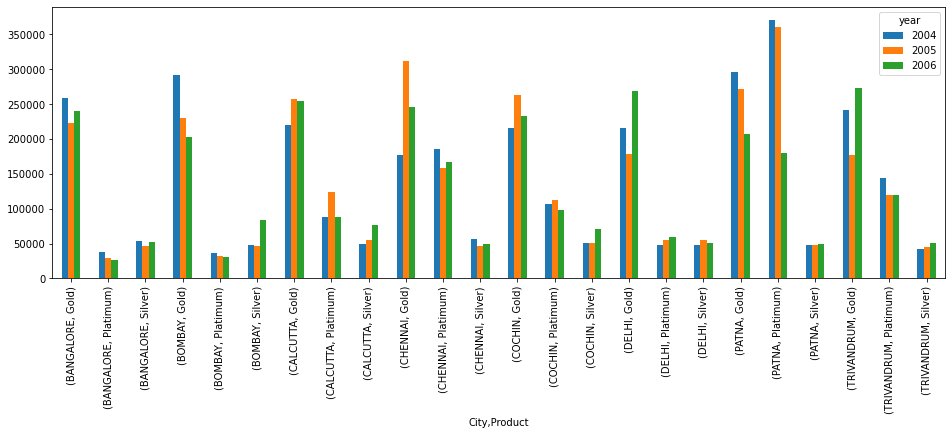

In [53]:
#3 graphical representation
city_spend.plot(kind='bar', figsize=(16,5))

In [54]:
#4a - Monthly comparison of total spends, city wise
monthly_spent=pd.pivot_table(data=cust_spend, index='month', columns='City', values='Amount', aggfunc='sum')
monthly_spent

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
month,,,,,,,,
1,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
2,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
3,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
4,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
5,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48
6,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
7,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
8,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
9,703018.28,1278402.79,1511713.57,745759.40,1382242.90,50001.00,70329.95,186063.70


<AxesSubplot:xlabel='month'>

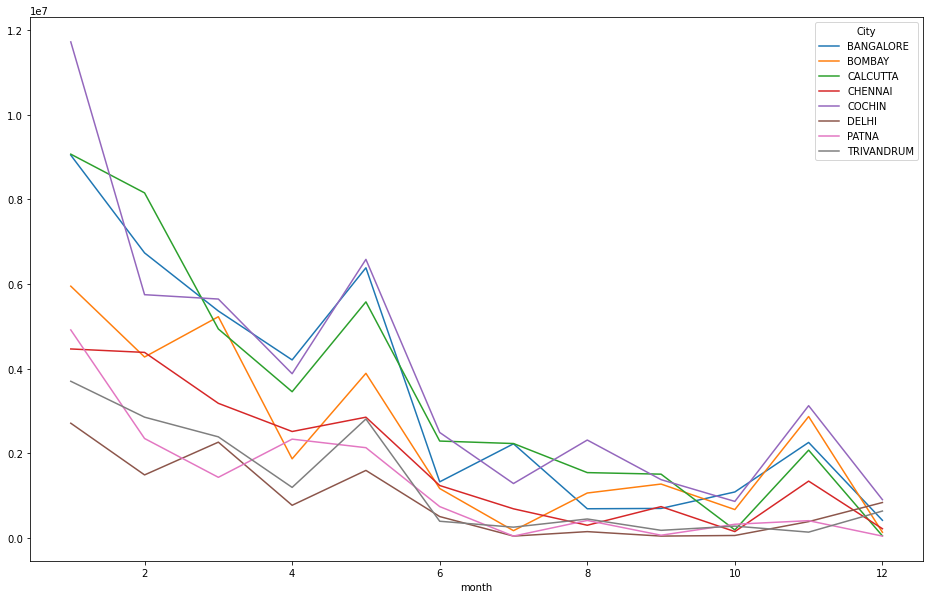

In [55]:
monthly_spent.plot(kind='line', figsize=(16,10))

In [56]:
#4b - Comparison of yearly spend on air tickets
yearly_spend_air=cust_spend[cust_spend['Type']=='AIR TICKET'][['year', 'Amount']].groupby('year').sum()
yearly_spend_air

,Amount
year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


<AxesSubplot:xlabel='year'>

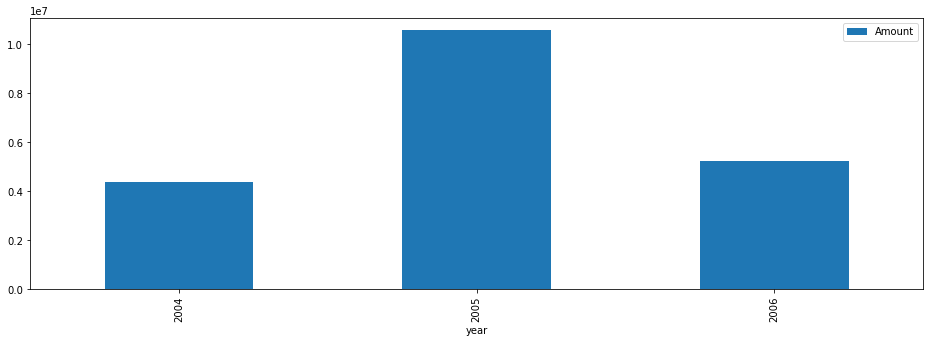

In [57]:
yearly_spend_air.plot(kind='bar', figsize=(16,5))

In [58]:
#4c - Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
monthly_spend_product=pd.pivot_table(data=cust_spend, index='month', columns='Product', values='Amount', aggfunc='sum')
monthly_spend_product

Product,Gold,Platimum,Silver
month,,,
1,32413831.83,14951578.51,4206383.62
2,24779179.55,9134054.58,2087018.37
3,19256972.48,7288837.68,3909405.83
4,13170572.59,5182493.86,1902322.65
5,21548169.76,8151926.49,2140940.01
6,6538862.64,2965712.71,689537.61
7,5167416.37,1288156.26,530153.72
8,4954030.42,1714762.80,293109.82
9,3816887.62,1667840.84,442803.13


<AxesSubplot:xlabel='month'>

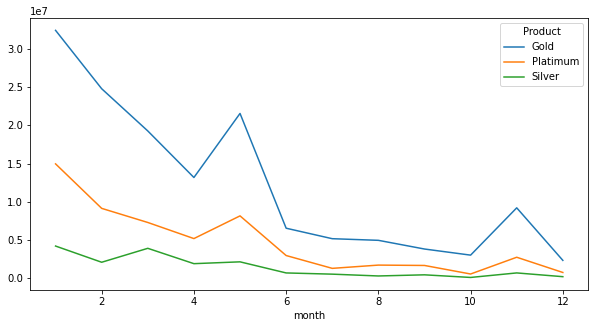

In [59]:
monthly_spend_product.plot(kind='line', figsize=(10,5))

In [61]:
#5 - Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

def city_customers(Prod, agg_time):
    if ((Prod=='Gold') & (agg_time=='monthly')):
        return (cust_data[cust_data['Product']=='Gold'][['year','month', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year','month', 'Customer']).agg(np.sum).sort_values(by=['City', 'year','month', 'repay_amount'], ascending=[True,True,True,False]).reset_index()).groupby(['City','year','month']).head(10)
    elif ((Prod=='Gold') & (agg_time=='yearly')):
        return (cust_data[cust_data['Product']=='Gold'][['year', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year', 'Customer']).agg(np.sum).sort_values(by=['City', 'year', 'repay_amount'], ascending=[True,True,False]).reset_index()).groupby(['City', 'year']).head(10)
    elif ((Prod=='Silver') & (agg_time=='monthly')):
        return (cust_data[cust_data['Product']=='Silver'][['year','month', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year','month', 'Customer']).agg(np.sum).sort_values(by=['City', 'year','month', 'repay_amount'], ascending=[True,True,True,False]).reset_index()).groupby(['City','year','month']).head(10)
    elif ((Prod=='Silver') & (agg_time=='yearly')):
        return (cust_data[cust_data['Product']=='Silver'][['year', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year', 'Customer']).agg(np.sum).sort_values(by=['City', 'year', 'repay_amount'], ascending=[True,True,False]).reset_index()).groupby(['City', 'year']).head(10)
    elif ((Prod=='Platinum') & (agg_time=='monthly')):
        return (cust_data[cust_data['Product']=='Platinum'][['year','month', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year','month', 'Customer']).agg(np.sum).sort_values(by=['City', 'year','month', 'repay_amount'], ascending=[True,True,True,False]).reset_index()).groupby(['City','year','month']).head(10)
    elif ((Prod=='Platinum') & (agg_time=='yearly')):
        return (cust_data[cust_data['Product']=='Platinum'][['year', 'repay_amount', 'City', 'Customer']].groupby(['City', 'year', 'Customer']).agg(np.sum).sort_values(by=['City', 'year', 'repay_amount'], ascending=[True,True,False]).reset_index()).groupby(['City', 'year']).head(10)
    return ('please enter : Gold/Silver/Platinum , monthly/yearly' )

In [62]:
city_customers('Platinum', 'yearly')

,City,year,Customer,repay_amount
0,BANGALORE,2004,A37,1097449.25
1,BANGALORE,2004,A52,535515.11
2,BANGALORE,2004,A5,50010.00
3,BANGALORE,2004,A19,50000.00
4,BANGALORE,2005,A37,798085.32
...,...,...,...,...
80,TRIVANDRUM,2004,A97,10000.00
81,TRIVANDRUM,2005,A39,3875189.61
82,TRIVANDRUM,2005,A48,140014.00
83,TRIVANDRUM,2006,A39,1889047.17
